Loading the dataset, Handling missing Values and Data-Preprocessing

Dataset loaded successfully.
Original shape of the data: (284807, 31)
------------------------------
Starting Exploratory Data Analysis...

--- 2.1. Check for Missing Values ---
Total missing values found: 0
No missing values found. Dataset is clean.
------------------------------

--- 2.2. Analyze Raw Feature Distributions (Justification for Scaling) ---
Plotting original 'Time' and 'Amount' distributions...


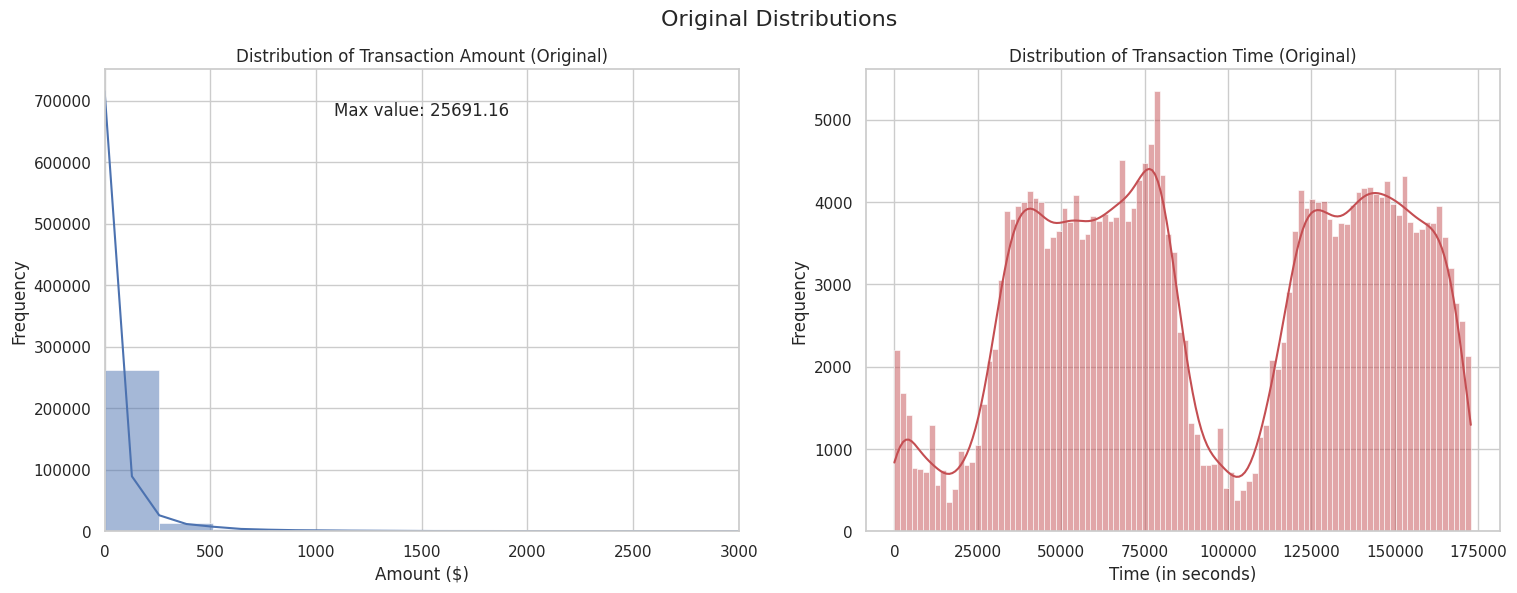

==> INSIGHT: 'Time' and 'Amount' are heavily skewed and on different scales than V features. Scaling is required.
------------------------------

--- 2.3. Analyze Behavior by Class ---

Descriptive statistics for Fraudulent 'Amount':
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Descriptive statistics for Non-Fraudulent 'Amount':
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


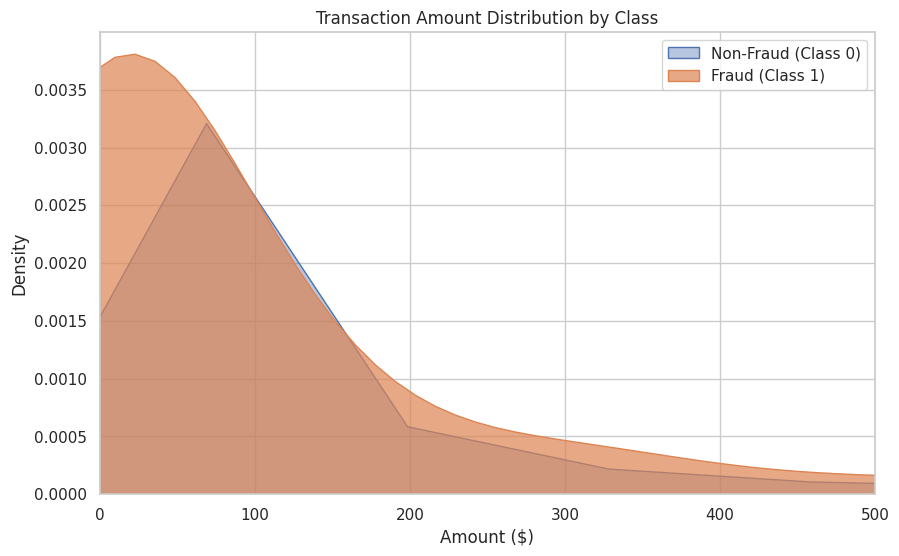

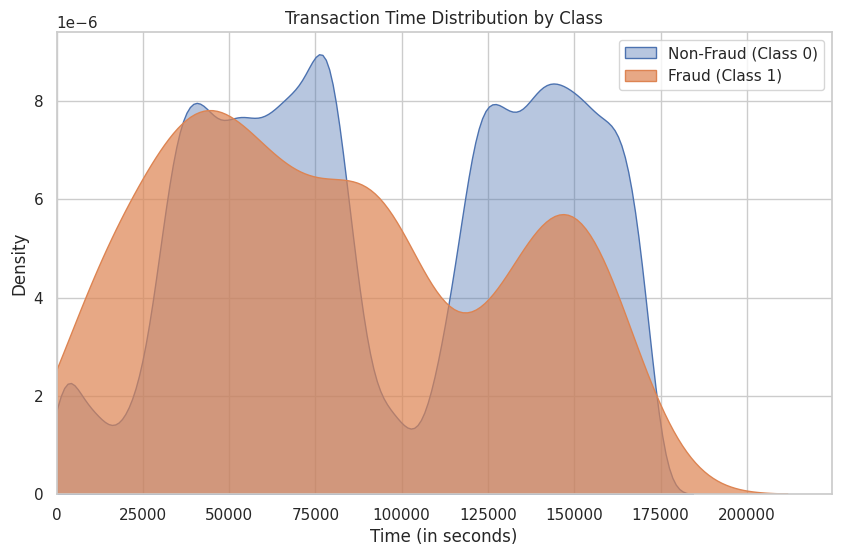

==> INSIGHT: Fraudulent transactions have a different distribution for 'Amount' and 'Time' than non-fraudulent ones.
------------------------------

--- 2.4. Analyze Class Imbalance ---
Total transactions: 284807
Fraudulent transactions (Class 1): 492
Non-Fraudulent transactions (Class 0): 284315
Percentage of fraudulent transactions: 0.173%


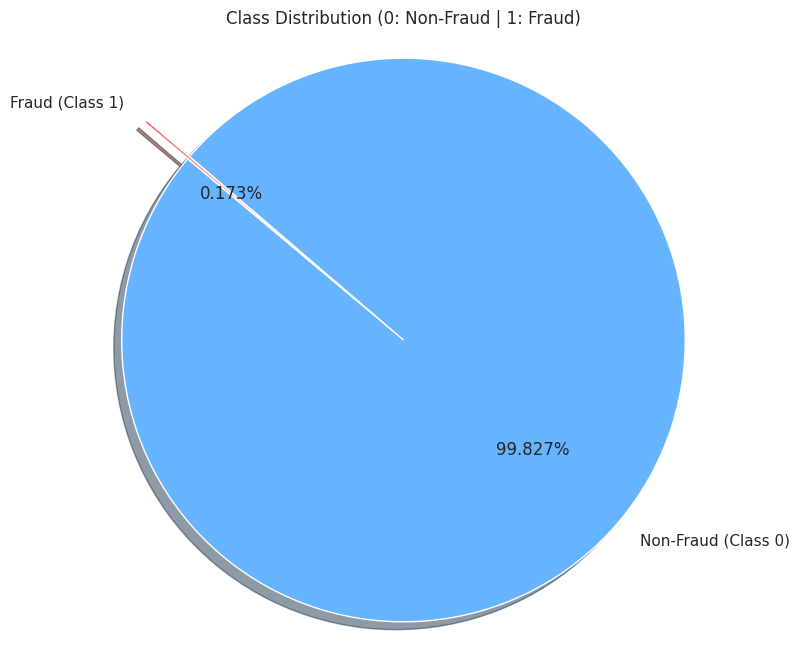

==> INSIGHT: Data is extremely imbalanced.
------------------------------

--- 2.5. Analyze PCA Component Correlations ---
Calculating correlations of each PCA component with the 'Class' variable...


/tmp/ipython-input-420263456.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca_class_corr_sorted.index, y=pca_class_corr_sorted.values, palette='vlag')


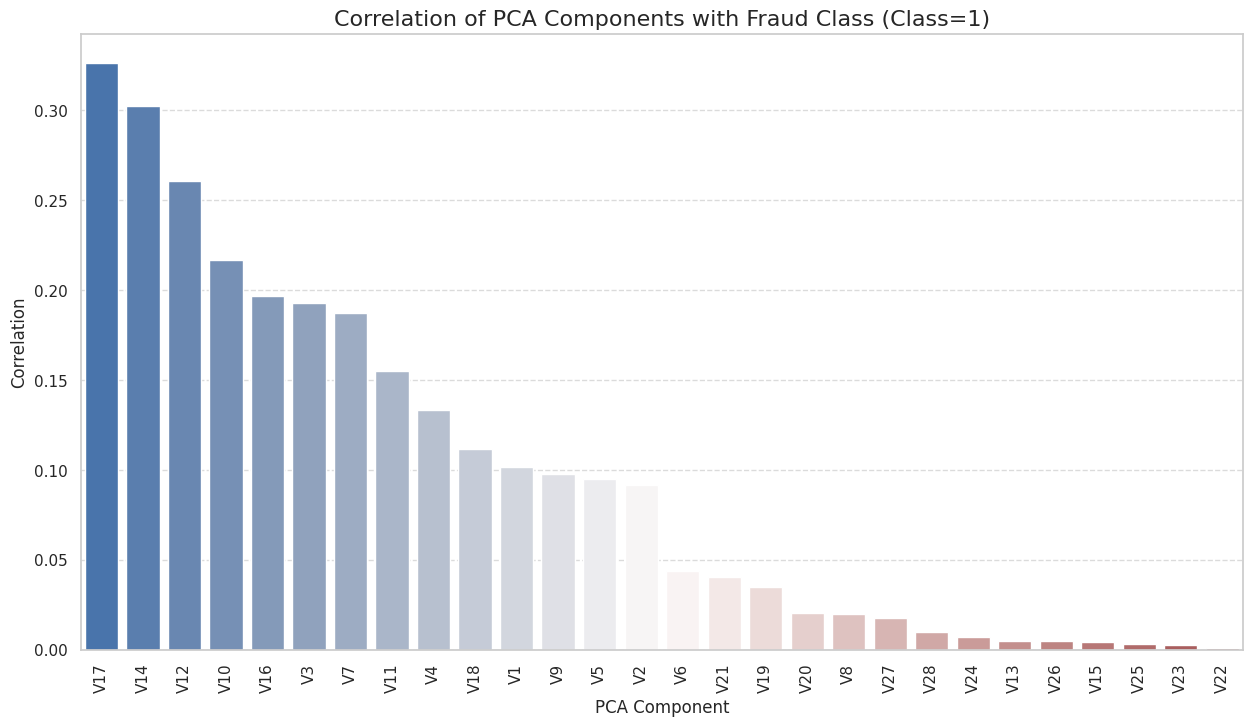

------------------------------

--- 2.6. Key PCA Component Analysis (Distribution by Class) ---
Discovered Top 4 Key PCA Components: ['V17', 'V14', 'V12', 'V10']
Plotting their distributions...


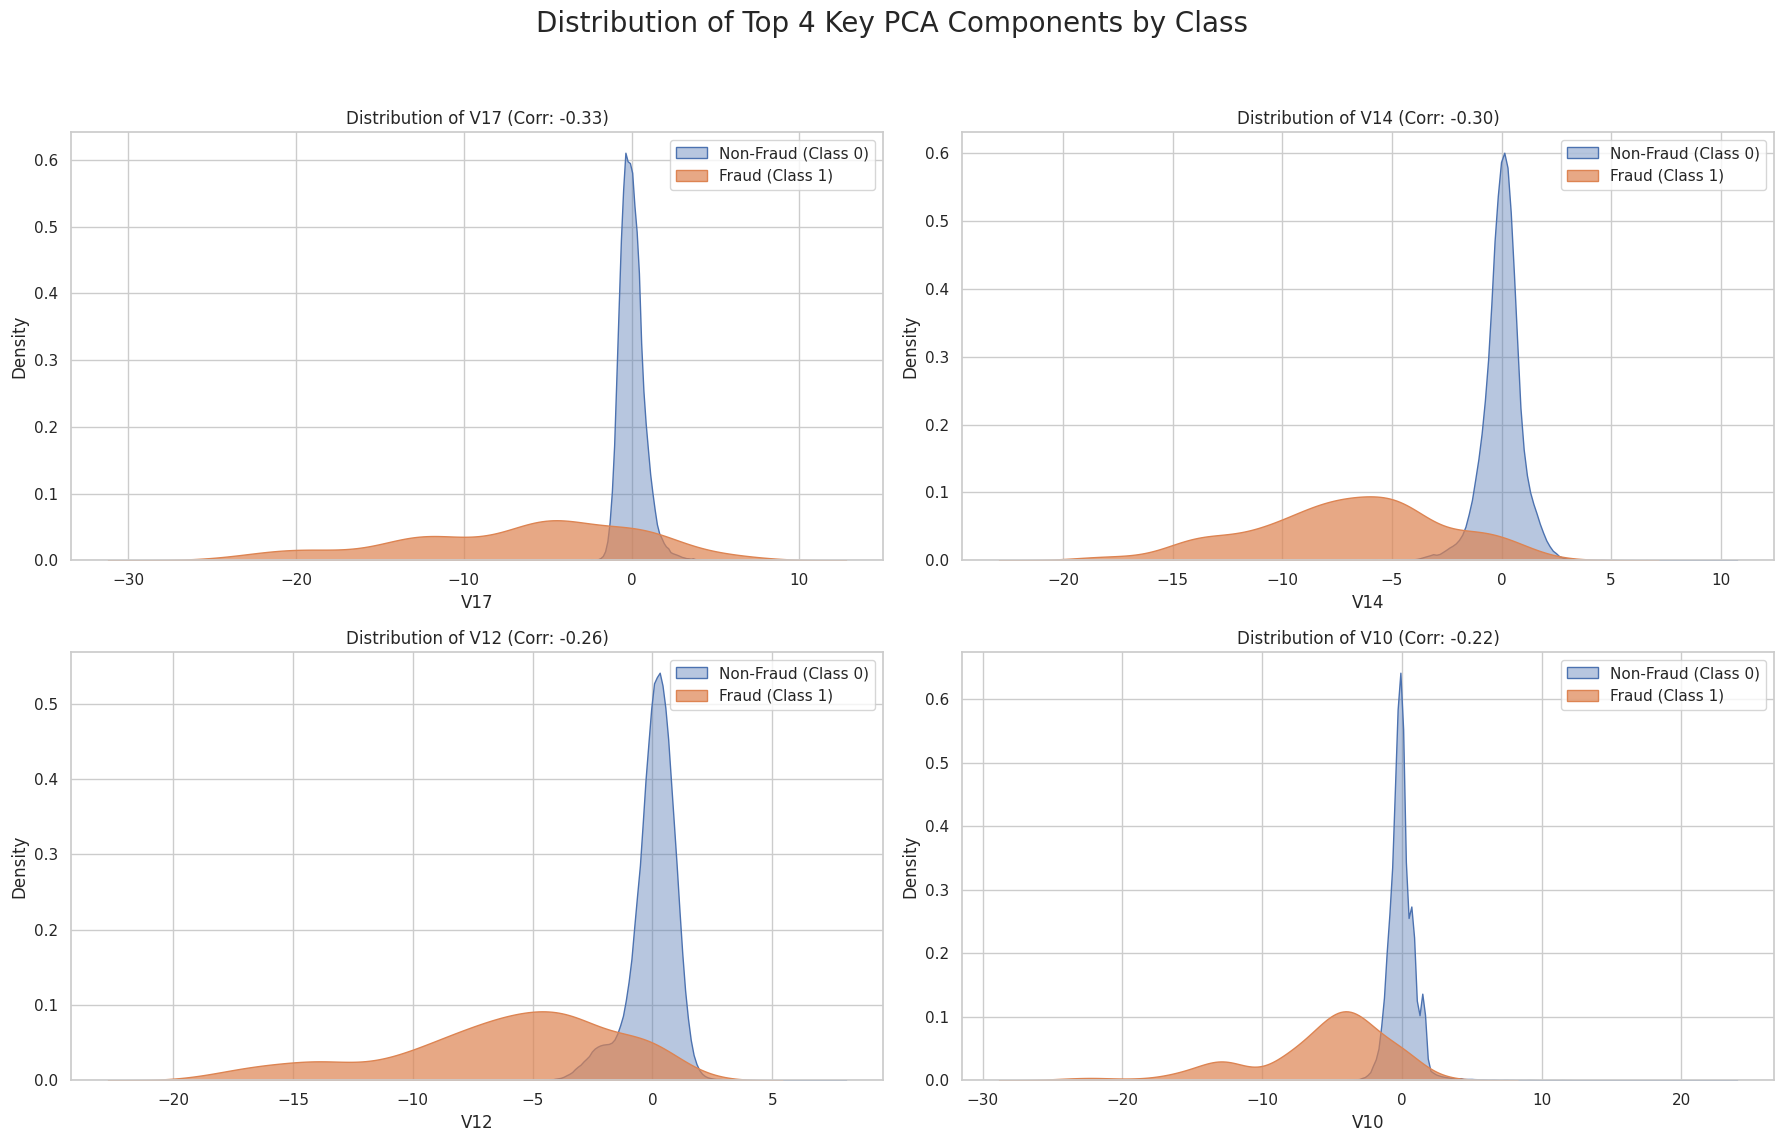

==> INSIGHT: The distributions for key components are clearly different for Fraud vs. Non-Fraud, confirming they are predictive.
------------------------------
EDA complete. Proceeding to Preprocessing based on insights.
------------------------------

--- 3. Data Preprocessing ---
Applying RobustScaler to 'Time' and 'Amount' based on EDA findings...
Original 'Time' and 'Amount' columns dropped.
'Class' column moved to the end.

Preprocessing complete.
------------------------------

FINAL: The preprocessed DataFrame 'df' is now ready for modeling.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# Set visualization style
sns.set(style="whitegrid")

# --- 1. Load Dataset ---
try:
    # Load the dataset
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully.")
    print(f"Original shape of the data: {df.shape}")
    print("-" * 30)
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found.")
    print("Please make sure the dataset is in the same directory as the script.")
    exit() # Stop the script if the file isn't found

# --- 2. Exploratory Data Analysis (EDA) ---
print("Starting Exploratory Data Analysis...")

# --- 2.1. Check for Missing Values ---
print("\n--- 2.1. Check for Missing Values ---")
total_missing = df.isnull().sum().sum()
print(f"Total missing values found: {total_missing}")

if total_missing > 0:
    # Strategy: Drop rows with missing values.
    print(f"\nDropping {total_missing} rows containing missing values...")
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True) # Reset index after dropping
    print(f"Dataset shape after dropping NaNs: {df.shape}")
else:
    print("No missing values found. Dataset is clean.")
print("-" * 30)


# --- 2.2. Analyze Raw Feature Distributions (Justification for Scaling) ---
print("\n--- 2.2. Analyze Raw Feature Distributions (Justification for Scaling) ---")
print("Plotting original 'Time' and 'Amount' distributions...")

# Show visualizations
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Plot for 'Amount'
sns.histplot(df['Amount'], bins=100, ax=ax1, color='b', kde=True)
ax1.set_title('Distribution of Transaction Amount (Original)')
ax1.set_xlabel('Amount ($)')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 3000) # Limit x-axis to see the main distribution
ax1.text(0.5, 0.9, f"Max value: {df['Amount'].max():.2f}",
         transform=ax1.transAxes, ha="center")

# Plot for 'Time'
sns.histplot(df['Time'], bins=100, ax=ax2, color='r', kde=True)
ax2.set_title('Distribution of Transaction Time (Original)')
ax2.set_xlabel('Time (in seconds)')
ax2.set_ylabel('Frequency')

plt.suptitle('Original Distributions', fontsize=16)
plt.show()

print("==> INSIGHT: 'Time' and 'Amount' are heavily skewed and on different scales than V features. Scaling is required.")
print("-" * 30)

# --- 2.3. Analyze Behavior by Class ---
print("\n--- 2.3. Analyze Behavior by Class ---")
# This analysis still uses the *original* 'Time' and 'Amount'
# to keep the x-axis interpretable (e.g., in dollars)

print("\nDescriptive statistics for Fraudulent 'Amount':")
print(df[df['Class'] == 1]['Amount'].describe())
print("\nDescriptive statistics for Non-Fraudulent 'Amount':")
print(df[df['Class'] == 0]['Amount'].describe())

# Plotting transaction amount distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Class'] == 0]['Amount'],
            label='Non-Fraud (Class 0)', fill=True, alpha=0.4)
sns.kdeplot(df[df['Class'] == 1]['Amount'],
            label='Fraud (Class 1)', fill=True, alpha=0.7)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Amount ($)')
plt.ylabel('Density')
plt.xlim(0, 500) # Zoom in on smaller amounts
plt.legend()
plt.show()


# Time distribution for fraud vs. non-fraud
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Class'] == 0]['Time'],
            label='Non-Fraud (Class 0)', fill=True, alpha=0.4)
sns.kdeplot(df[df['Class'] == 1]['Time'],
            label='Fraud (Class 1)', fill=True, alpha=0.7)
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time (in seconds)')
plt.ylabel('Density')
plt.xlim(left=0)
plt.legend()
plt.show()
print("==> INSIGHT: Fraudulent transactions have a different distribution for 'Amount' and 'Time' than non-fraudulent ones.")
print("-" * 30)


# --- 2.4. Analyze Class Imbalance ---
print("\n--- 2.4. Analyze Class Imbalance ---")
class_counts = df['Class'].value_counts()
fraud_percentage = class_counts[1] / class_counts.sum() * 100

print(f"Total transactions: {len(df)}")
print(f"Fraudulent transactions (Class 1): {class_counts[1]}")
print(f"Non-Fraudulent transactions (Class 0): {class_counts[0]}")
print(f"Percentage of fraudulent transactions: {fraud_percentage:.3f}%")

plt.figure(figsize=(8, 8))
labels = ['Non-Fraud (Class 0)', 'Fraud (Class 1)']
sizes = class_counts.values
colors = ['#66b3ff', '#ff6666']  # Blue for Non-Fraud, Red for Fraud
explode = (0, 0.2)  # 'Explode' the 2nd slice (Fraud) to make it visible

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.3f%%',  # Show percentage with 3 decimal places
        shadow=True, startangle=140)

plt.title('Class Distribution (0: Non-Fraud | 1: Fraud)')
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()
print("==> INSIGHT: Data is extremely imbalanced.")
print("-" * 30)


# --- 2.5. Analyze PCA Component Correlations ---
print("\n--- 2.5. Analyze PCA Component Correlations ---")

# Correlation with Class Variable
print("Calculating correlations of each PCA component with the 'Class' variable...")
correlations = df.corr()['Class'].copy()
abs_correlations = correlations.abs()

# Filter for only PCA components (V1, V2, etc.)
pca_class_corr = abs_correlations.filter(like='V')
pca_class_corr_sorted = pca_class_corr.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x=pca_class_corr_sorted.index, y=pca_class_corr_sorted.values, palette='vlag')
plt.title('Correlation of PCA Components with Fraud Class (Class=1)', fontsize=16)
plt.xlabel('PCA Component')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("-" * 30)


# --- 2.6. Key PCA Component Analysis (Distribution by Class) ---
print("\n--- 2.6. Key PCA Component Analysis (Distribution by Class) ---")

# We already found the sorted components in step 2.4
key_components = pca_class_corr_sorted.head(4).index.tolist()

print(f"Discovered Top 4 Key PCA Components: {key_components}")
print("Plotting their distributions...")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Distribution of Top 4 Key PCA Components by Class', fontsize=20)
axes = axes.flatten()

for i, component in enumerate(key_components):
    sns.kdeplot(df[df['Class'] == 0][component],
                ax=axes[i], label='Non-Fraud (Class 0)', fill=True, alpha=0.4)
    sns.kdeplot(df[df['Class'] == 1][component],
                ax=axes[i], label='Fraud (Class 1)', fill=True, alpha=0.7)

    # Add the original correlation value (not absolute)
    corr_val = correlations[component]
    axes[i].set_title(f'Distribution of {component} (Corr: {corr_val:.2f})')
    axes[i].set_xlabel(component)
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("==> INSIGHT: The distributions for key components are clearly different for Fraud vs. Non-Fraud, confirming they are predictive.")
print("-" * 30)

print("EDA complete. Proceeding to Preprocessing based on insights.")
print("-" * 30)


# --- 3. Data Preprocessing ---
print("\n--- 3. Data Preprocessing ---")
print("Applying RobustScaler to 'Time' and 'Amount' based on EDA findings...")

# Using RobustScaler as it's less sensitive to outliers
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)
print("Original 'Time' and 'Amount' columns dropped.")

# Rearrange columns to put 'Class' at the end
cols = [col for col in df.columns if col != 'Class'] + ['Class']
df = df[cols]
print("'Class' column moved to the end.")

print("\nPreprocessing complete.")
print("-" * 30)

print("\nFINAL: The preprocessed DataFrame 'df' is now ready for modeling.")


--- 4. Model Training: Baseline (LogisticRegression) ---
Features shape (X): (284807, 30)
Target shape (y): (284807,)
Training set size: 227845
Test set size: 56962
Fraud ratio in train set: 0.173%
Fraud ratio in test set: 0.172%
------------------------------
Training Logistic Regression model...
Model training complete.
------------------------------
Evaluating model performance on the test set...
Area Under Precision-Recall Curve (AUC-PR): 0.7189
Fraud Precision: 0.0610
Fraud Recall: 0.9184
Fraud F1-Score: 0.1144

Full Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     56864
    Fraud (1)       0.06      0.92      0.11        98

     accuracy                           0.98     56962
    macro avg       0.53      0.95      0.55     56962
 weighted avg       1.00      0.98      0.99     56962

------------------------------
Plotting Precision-Recall Curve...


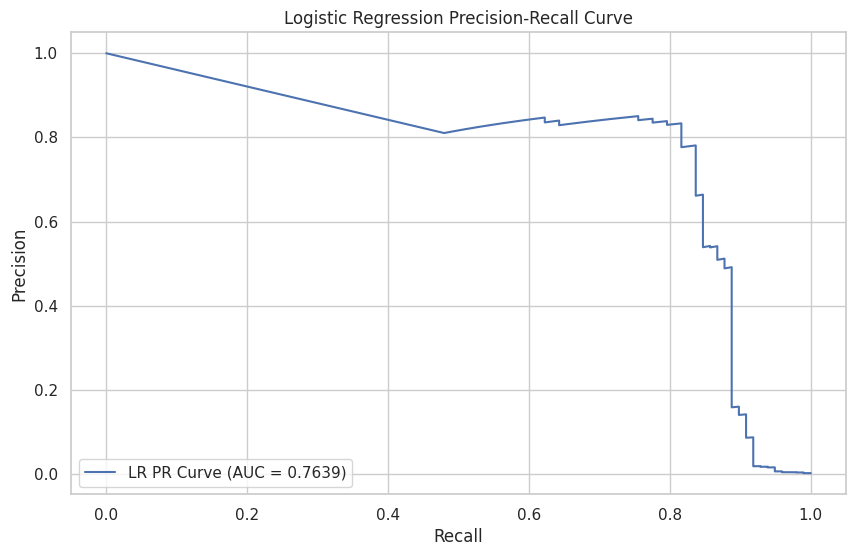


Baseline model (Logistic Regression) complete.


In [ ]:
# --- 4. Model Training: Baseline (Logistic Regression) ---
print("\n--- 4. Model Training: Baseline (LogisticRegression) ---")

# Import necessary libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve, auc, f1_score, precision_score, recall_score

# --- 4.1. Split Data into Features (X) and Target (y) ---

# X = all columns except the last one ('Class')
X = df.iloc[:, :-1]
# y = only the last column ('Class')
y = df.iloc[:, -1]

print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")


# --- 4.2. Create Stratified Train-Test Split ---
# We use stratify=y to ensure the test set has the same fraud ratio as the full dataset
# This is critical for imbalanced data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Fraud ratio in train set: {y_train.mean()*100:.3f}%")
print(f"Fraud ratio in test set: {y_test.mean()*100:.3f}%")
print("-" * 30)


# --- 4.3. Train Logistic Regression Model ---
print("Training Logistic Regression model...")

# Instantiate the model
# We set class_weight='balanced' as planned in the report to handle imbalance.
# 'solver' and 'random_state' are set for reproducible results.
lr_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

print("Model training complete.")
print("-" * 30)


# --- 4.4. Evaluate Model Performance ---
print("Evaluating model performance on the test set...")

# Get class predictions (0 or 1)
y_pred = lr_model.predict(X_test)

# Get probability scores for the positive class (Fraud)
# This is needed for the AUC-PR calculation
y_scores = lr_model.predict_proba(X_test)[:, 1]

# 1. Primary Metric: AUC-PR (Average Precision Score)
auc_pr = average_precision_score(y_test, y_scores)
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr:.4f}")

# 2. Secondary Metrics: Precision, Recall, F1-Score (for Fraud Class)
# We can get these directly from the classification report or individual functions

# Using individual functions for clarity (labels=[1] specifies the fraud class)
fraud_precision = precision_score(y_test, y_pred, labels=[1], average='binary')
fraud_recall = recall_score(y_test, y_pred, labels=[1], average='binary')
fraud_f1 = f1_score(y_test, y_pred, labels=[1], average='binary')

print(f"Fraud Precision: {fraud_precision:.4f}")
print(f"Fraud Recall: {fraud_recall:.4f}")
print(f"Fraud F1-Score: {fraud_f1:.4f}")

# 3. Full Classification Report
print("\nFull Classification Report:")
# target_names=['Non-Fraud (0)', 'Fraud (1)'] adds clarity
print(classification_report(y_test, y_pred, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)


# --- 4.5. Plot Precision-Recall Curve ---
print("Plotting Precision-Recall Curve...")

# Calculate PR curve points
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the AUC (Area Under Curve) for the PR curve
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', label=f'LR PR Curve (AUC = {pr_auc:.4f})')
plt.title('Logistic Regression Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("\nBaseline model (Logistic Regression) complete.")


--- 5. Model Training: Intermediate (RandomForest) ---
Training Random Forest model...
Model training complete.
------------------------------
Evaluating model performance on the test set...
Area Under Precision-Recall Curve (AUC-PR): 0.8522
Fraud Precision: 0.9487
Fraud Recall: 0.7551
Fraud F1-Score: 0.8409

Full Classification Report:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.95      0.76      0.84        98

     accuracy                           1.00     56962
    macro avg       0.97      0.88      0.92     56962
 weighted avg       1.00      1.00      1.00     56962

------------------------------
Plotting Precision-Recall Curve (RF vs. LR)...


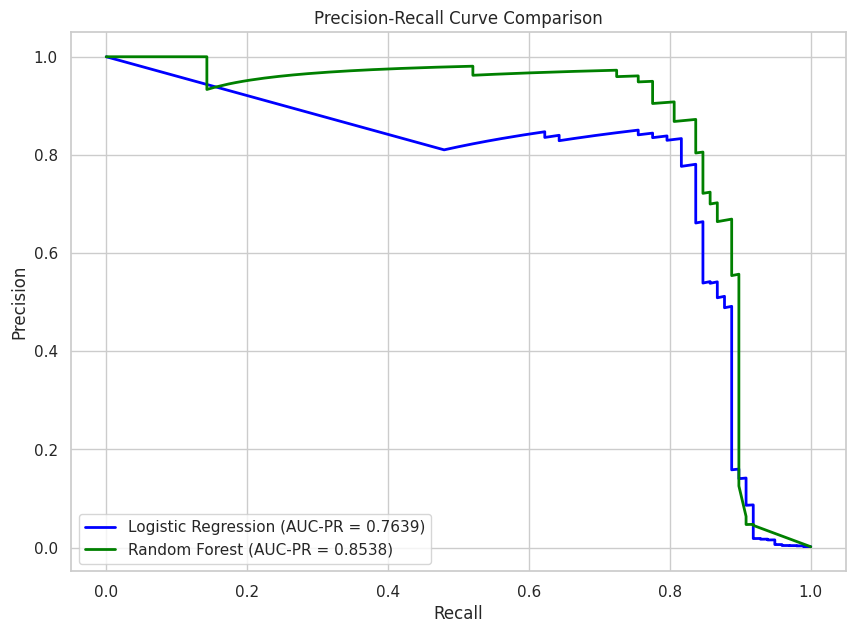


Intermediate model (Random Forest) complete.


In [ ]:
# --- 5. Model Training: Intermediate (Random Forest) ---
print("\n--- 5. Model Training: Intermediate (RandomForest) ---")

# Import the new model
from sklearn.ensemble import RandomForestClassifier

# --- 5.1. Train Random Forest Model ---
print("Training Random Forest model...")

# Instantiate the model
# We use the parameters discussed in the report:
# class_weight='balanced' handles imbalance.
# n_estimators and max_depth are key tuning parameters.
# n_jobs=-1 uses all CPU cores for faster training.
rf_model = RandomForestClassifier(
    n_estimators=100,         # Number of trees (tunable)
    max_depth=20,             # Max depth of trees (tunable)
    class_weight='balanced',  # Handles imbalance
    n_jobs=-1,                # Use all available CPUs
    random_state=42
)

# Train the model (using the same data as before)
rf_model.fit(X_train, y_train)

print("Model training complete.")
print("-" * 30)


# --- 5.2. Evaluate Model Performance ---
print("Evaluating model performance on the test set...")

# Get class predictions (0 or 1)
y_pred_rf = rf_model.predict(X_test)

# Get probability scores for the positive class (Fraud)
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]

# 1. Primary Metric: AUC-PR (Average Precision Score)
auc_pr_rf = average_precision_score(y_test, y_scores_rf)
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr_rf:.4f}")

# 2. Secondary Metrics: Precision, Recall, F1-Score (for Fraud Class)
fraud_precision_rf = precision_score(y_test, y_pred_rf, labels=[1], average='binary')
fraud_recall_rf = recall_score(y_test, y_pred_rf, labels=[1], average='binary')
fraud_f1_rf = f1_score(y_test, y_pred_rf, labels=[1], average='binary')

print(f"Fraud Precision: {fraud_precision_rf:.4f}")
print(f"Fraud Recall: {fraud_recall_rf:.4f}")
print(f"Fraud F1-Score: {fraud_f1_rf:.4f}")

# 3. Full Classification Report
print("\nFull Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)


# --- 5.3. Plot Comparative Precision-Recall Curve ---
print("Plotting Precision-Recall Curve (RF vs. LR)...")

# Calculate PR curve points for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# Create the plot
plt.figure(figsize=(10, 7))

# Plot the baseline Logistic Regression curve (variables are from the previous code block)
plt.plot(recall, precision, color='blue', lw=2,
         label=f'Logistic Regression (AUC-PR = {pr_auc:.4f})')

# Plot the new Random Forest curve
plt.plot(recall_rf, precision_rf, color='green', lw=2,
         label=f'Random Forest (AUC-PR = {pr_auc_rf:.4f})')

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("\nIntermediate model (Random Forest) complete.")


--- 6. Model Training: Advanced (XGBoost) ---
Calculated 'scale_pos_weight' for XGBoost: 577.29
------------------------------
Training XGBoost model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:29:14] WARNING: /workspace/src/context.cc:53: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:29:14] WARNING: /workspace/src/context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete (on GPU).
------------------------------
Evaluating XGBoost model performance on the test set...
Area Under Precision-Recall Curve (AUC-PR): 0.8787
Fraud Precision: 0.8542
Fraud Recall: 0.8367
Fraud F1-Score: 0.8454

Full Classification Report (XGBoost):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.85      0.84      0.85        98

     accuracy                           1.00     56962
    macro avg       0.93      0.92      0.92     56962
 weighted avg       1.00      1.00      1.00     56962

------------------------------
Plotting Final Precision-Recall Curve (All Models)...


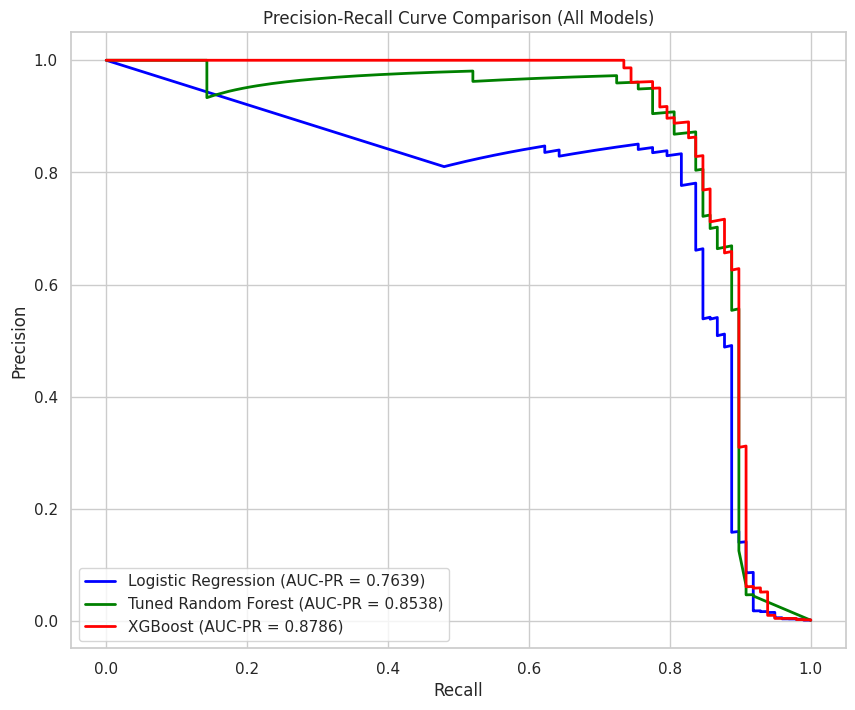


Advanced model (XGBoost) complete.
All modeling steps are now finished.


In [ ]:
# --- 6. Model Training: Advanced (XGBoost) ---
print("\n--- 6. Model Training: Advanced (XGBoost) ---")

# Import the XGBoost library
# (This is pre-installed on Google Colab)
import xgboost as xgb

# --- 6.1. Handle Class Imbalance for XGBoost ---
# XGBoost uses a parameter called 'scale_pos_weight' instead of 'class_weight'.
# The formula is: count(negative_class) / count(positive_class)

# Calculate counts from the TRAINING set (y_train)
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight = neg_count / pos_count

print(f"Calculated 'scale_pos_weight' for XGBoost: {scale_pos_weight:.2f}")
print("-" * 30)

# --- 6.2. Train XGBoost Model ---
print("Training XGBoost model...")

# We will try to use the GPU.
# In Colab, go to Runtime -> Change runtime type -> T4 GPU
try:
    xgb_model = xgb.XGBClassifier(
        n_estimators=500,             # Number of trees (tunable)
        learning_rate=0.05,            # Learning rate (tunable)
        max_depth=5,                  # Max depth (tunable)
        scale_pos_weight=scale_pos_weight, # Handles imbalance
        device='cuda',                # Use the GPU
        tree_method='hist',           # Fast histogram-based method
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    print("Model training complete (on GPU).")
except Exception as e:
    print(f"GPU not found or error: {e}")
    print("Falling back to CPU...")
    xgb_model = xgb.XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        scale_pos_weight=scale_pos_weight,
        n_jobs=-1,                    # Use all CPU cores
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    print("Model training complete (on CPU).")

print("-" * 30)


# --- 6.3. Evaluate XGBoost Model Performance ---
print("Evaluating XGBoost model performance on the test set...")

# Get class predictions (0 or 1)
y_pred_xgb = xgb_model.predict(X_test)

# Get probability scores for the positive class (Fraud)
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 1. Primary Metric: AUC-PR (Average Precision Score)
auc_pr_xgb = average_precision_score(y_test, y_scores_xgb)
print(f"Area Under Precision-Recall Curve (AUC-PR): {auc_pr_xgb:.4f}")

# 2. Secondary Metrics: Precision, Recall, F1-Score (for Fraud Class)
fraud_precision_xgb = precision_score(y_test, y_pred_xgb, labels=[1], average='binary')
fraud_recall_xgb = recall_score(y_test, y_pred_xgb, labels=[1], average='binary')
fraud_f1_xgb = f1_score(y_test, y_pred_xgb, labels=[1], average='binary')

print(f"Fraud Precision: {fraud_precision_xgb:.4f}")
print(f"Fraud Recall: {fraud_recall_xgb:.4f}")
print(f"Fraud F1-Score: {fraud_f1_xgb:.4f}")

# 3. Full Classification Report
print("\nFull Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print("-" * 30)


# --- 6.4. Plot Final Comparative Precision-Recall Curve ---
print("Plotting Final Precision-Recall Curve (All Models)...")

# Calculate PR curve points for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_scores_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the baseline Logistic Regression curve (variables from Section 4)
plt.plot(recall, precision, color='blue', lw=2,
         label=f'Logistic Regression (AUC-PR = {pr_auc:.4f})')

# Plot the Tuned Random Forest curve (variables from Section 5)
plt.plot(recall_rf, precision_rf, color='green', lw=2,
         label=f'Tuned Random Forest (AUC-PR = {pr_auc_rf:.4f})')

# Plot the new XGBoost curve
plt.plot(recall_xgb, precision_xgb, color='red', lw=2,
         label=f'XGBoost (AUC-PR = {pr_auc_xgb:.4f})')

plt.title('Precision-Recall Curve Comparison (All Models)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("\nAdvanced model (XGBoost) complete.")
print("All modeling steps are now finished.")